In [1]:
# Run some setup code for this notebook.
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
# print(y_test)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [4]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


(3072,)
[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


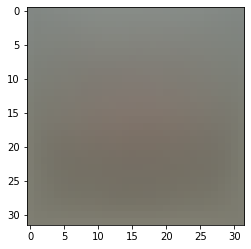

Training data shape:  (49000, 3072)


In [5]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image.shape)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

# second: subtract the mean image from train and test data

print('Training data shape: ', X_train.shape)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image


In [6]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.svm
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [7]:
train_X = X_val
train_Y = y_val
test_X = X_dev
test_Y = y_dev


In [11]:
import time
start = time.time()
svm_rbf = SVC(kernel='poly',degree = 2)
svm_rbf.fit(train_X,train_Y)
score_train = svm_rbf.score(train_X,train_Y)
print("Train score :",score_train)
score_test = svm_rbf.score(test_X,test_Y)
print("Test score :",score_test)
end = time.time()
T = end - start
print("Time: %dh %dmin %f s" %(T/3600,T/60%60,T%60))

Train score : 0.748
Test score : 0.27
Time: 0h 0min 11.187448 s


In [7]:
train_X = X_val
train_Y = y_val
test_X = X_dev
test_Y = y_dev

import time
tic = time.time()

clf = SVC(kernel='rbf') 
# coef0 = np.linspace(-5, 0, 10)
C = [0.1,1,10,100]
gamma = [1,2,3,4,5]
param_grid = {'C':C,'gamma': gamma}
clf = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)
clf.fit(train_X,train_Y)
print("最优参数:{},对应score:{}".format(clf.best_params_, clf.best_score_))
print("最优clf:{}".format(clf.best_estimator_))

toc = time.time()
print('Time:computed in %fs' % (toc - tic))


最优参数:{'C': 0.1, 'gamma': 1},对应score:0.1189992387597178
最优clf:SVC(C=0.1, gamma=1)
Time:computed in 347.044651s


In [12]:
def pca(data_train,data_test):
#     print("原来数据：\n",data_train,data_test)
    # 实例化转换器类
    transfer = PCA(n_components = 2)
    pca_model = transfer.fit(data_train)
    data_new1 = pca_model.transform(data_train)
    data_new2 = pca_model.transform(data_test)    
    print("处理后结果：\n",data_new1,data_new2)
    print("处理后shape：\n",data_new1.shape,data_new2.shape)
    
    return data_new1,data_new2
test_X = X_dev
test_Y = y_dev
train_X,test_Y = pca(train_X,test_X)

处理后结果：
 [[ 1973.14825489  -991.58949634]
 [ 4475.78155517  1870.90452518]
 [  329.97970701  -481.47497619]
 ...
 [  125.51225307 -2865.15544844]
 [ 2845.36509945  -966.86677323]
 [ 1045.05151863   -39.24040813]] [[ 1.49515287e+03 -6.72649021e+02]
 [ 1.50471379e+03  1.35843457e+03]
 [ 1.14671294e+03 -1.55010510e+02]
 [ 5.20657073e+02 -1.73791141e+03]
 [-1.50094062e+03 -5.17728534e+02]
 [-8.16728264e+01 -2.53487402e+02]
 [ 3.77291996e+03 -9.95294887e+02]
 [ 2.37051463e+03 -1.13519243e+03]
 [ 7.64799798e+01  3.04904302e+01]
 [ 3.71119112e+02 -8.33967614e+02]
 [ 2.46715382e+02 -9.80721268e+02]
 [-3.12385609e+02 -3.01399607e+02]
 [-1.52592254e+03 -3.43142612e+02]
 [ 1.77002713e+03 -5.36356517e+02]
 [ 4.64588998e+02  5.94715235e+02]
 [-4.60468717e+01 -1.85893022e+02]
 [-8.16835418e+02  1.44584062e+03]
 [ 1.77291029e+03 -1.53531189e+02]
 [ 1.77318589e+03 -2.92522485e+03]
 [ 1.15354024e+03  3.81712590e+02]
 [ 3.53075369e+03  1.21589168e+03]
 [-6.68026878e+02  1.01629988e+03]
 [-2.86294735e+03 

In [13]:

# train_X = X_dev
# train_Y = y_dev

import time
tic = time.time()

clf = SVC(kernel='rbf') 
# coef0 = np.linspace(-5, 0, 10)
C = [0.1,1,10,100]
gamma = [1,2,3,4,5]
param_grid = {'C':C,'gamma': gamma}
clf = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)
clf.fit(train_X,train_Y)
print("最优参数:{},对应score:{}".format(clf.best_params_, clf.best_score_))
print("最优clf:{}".format(clf.best_estimator_))

toc = time.time()
print('Time:computed in %fs' % (toc - tic))

最优参数:{'C': 0.1, 'gamma': 1},对应score:0.1189992387597178
最优clf:SVC(C=0.1, gamma=1)
Time:computed in 5.182184s
